# NAIVBAYS-Classification


In [101]:
#import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [102]:
dataset = pd.read_csv("logit-classification.csv")

In [103]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [104]:
# Userid, Gender is not more important
X = dataset.iloc[:, 2:4].values
Y = dataset.iloc[:,-1].values

In [105]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [106]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [107]:
#Split Traning Data and testing data as 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

In [108]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [109]:
#Scaling done by Standard Scaler range as -n to n
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

In [110]:
X_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [111]:
X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


In [ ]:
# make BernoulliNB classifier model
#from sklearn.naive_bayes import BernoulliNB
#classifer = BernoulliNB()

# make GaussianNB classifier model
#from sklearn.naive_bayes import GaussianNB
#classifer = GaussianNB()

# make MultinomialNB classifier model
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()




In [113]:
#fitting traning data to model
classifer.fit(X_train, Y_train)

MultinomialNB()

In [114]:
#predict value by KNN model
Y_pred = classifer.predict(X_test)

In [115]:
print(Y_pred)

[1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0]


In [116]:
#print metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nAccuracy :: \n", accuracy_score(Y_test, Y_pred))
print("\n Confusion Matrix :: \n", confusion_matrix(Y_test, Y_pred))
print("\n Classification Report ::\n", classification_report(Y_test, Y_pred))


Accuracy :: 
 0.5625

 Confusion Matrix :: 
 [[38 20]
 [15  7]]

 Classification Report ::
               precision    recall  f1-score   support

           0       0.72      0.66      0.68        58
           1       0.26      0.32      0.29        22

    accuracy                           0.56        80
   macro avg       0.49      0.49      0.49        80
weighted avg       0.59      0.56      0.57        80



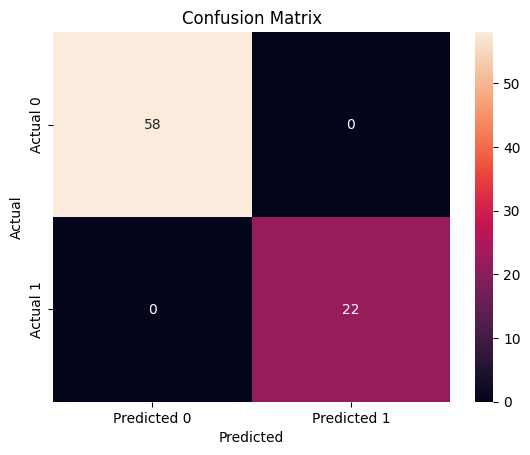

In [117]:
#Heatmap for confusion matrix
sns.heatmap(confusion_matrix(Y_test, Y_test), annot=True, fmt="d", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [118]:
# Bais and Variance score
bais = classifer.score(X_train, Y_train)
variance = classifer.score(X_test, Y_test)

In [119]:
print("Bais :", bais)
print("Variance :", variance)

Bais : 0.671875
Variance : 0.5625


In [120]:
# Future Data predictions
dataset1 = pd.read_csv("final1.csv")
d2 = dataset1.copy()
dataset1 = dataset1.iloc[:, [3,4]].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
M = sc.fit_transform(dataset1)

Y_pred1 = pd.DataFrame()
d2['y_pred1'] = classifer.predict(M)
d2.to_csv('final2.csv')